In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.path.exists(r"C:\Users\jarup\Downloads\sony\ML\height-weight.csv")

True

In [3]:
df = pd.read_csv(r"C:\Users\jarup\Downloads\sony\ML\height-weight.csv")

In [4]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [15]:
#read the data


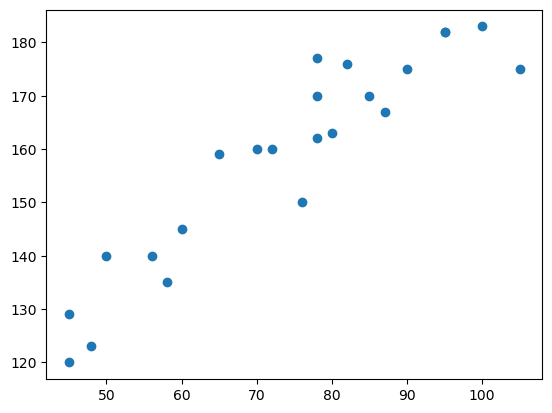

In [17]:
plt.scatter(df.Weight,df.Height)

In [19]:
#divide the data into x,y
x=df[['Weight']]
y=df[['Height']]

In [21]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [23]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [25]:
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 1)

In [27]:
x_train

,Weight
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78
22,72


In [29]:
x_test

,Weight
20,45
17,65
3,60
13,100
19,87
16,50
10,82


In [31]:
y_train

,Height
4,160
2,123
18,150
6,163
7,175
1,135
14,170
0,120
15,177
22,160


In [33]:
y_test

,Height
20,129
17,159
3,145
13,183
19,167
16,140
10,176


In [35]:
#scaling
from sklearn.preprocessing import StandardScaler

In [37]:
scaler=StandardScaler()

In [39]:
scaler

StandardScaler()

In [41]:
#tarin data >> fit and transform will be used
x_train =scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [43]:
x_train

array([[-0.33596868],
       [-1.6647437 ],
       [ 0.0264245 ],
       [ 0.26801996],
       [ 0.8720086 ],
       [-1.06075505],
       [ 0.57001428],
       [-1.84594029],
       [ 0.14722223],
       [-0.21517095],
       [-1.18155278],
       [ 0.14722223],
       [ 1.17400292],
       [ 1.77799157],
       [ 1.17400292],
       [ 0.14722223]])

In [45]:
x_test

array([[-1.84594029],
       [-0.637963  ],
       [-0.93995732],
       [ 1.47599724],
       [ 0.69081201],
       [-1.54394597],
       [ 0.38881769]])

In [47]:
#model training
from sklearn.linear_model import LinearRegression


In [49]:
reg = LinearRegression()

In [51]:
reg

LinearRegression()

In [53]:
reg.fit(x_train,y_train)

LinearRegression()

In [55]:
print("the coef is ",reg.coef_)

the coef is  [[17.96866211]]


In [57]:
print("the intercept is ",reg.intercept_)

the intercept is  [159.]


In [ ]:
#y_pred = intercept + coef (x)
#159 + x_train*17

In [60]:
reg.predict(x_train)

array([[152.96309227],
       [129.08678304],
       [159.47481297],
       [163.8159601 ],
       [174.66882793],
       [139.93965087],
       [169.24239401],
       [125.83092269],
       [161.64538653],
       [155.13366584],
       [137.76907731],
       [161.64538653],
       [180.09526185],
       [190.94812968],
       [180.09526185],
       [161.64538653]])

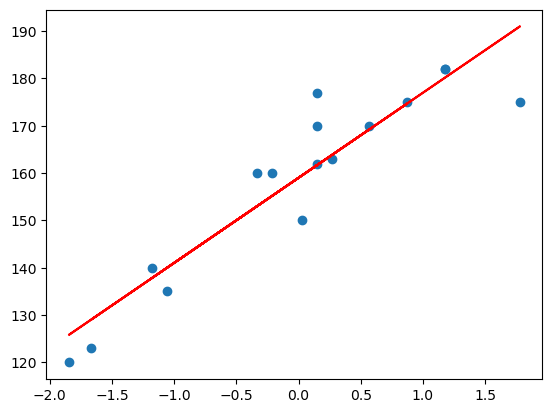

In [64]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color= 'red')

In [66]:
y_pred_test=reg.predict(x_test)

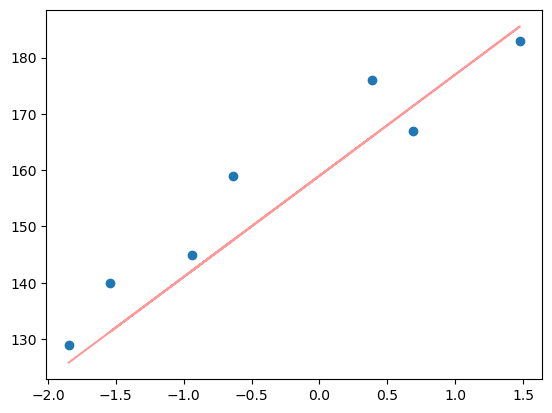

In [78]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test, color = '#ff9999')

In [82]:
# evaluvation metrix
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score

In [84]:
mean_squared_error(y_test,y_pred_test)

50.33408704814381

In [86]:
mean_absolute_error(y_test,y_pred_test)

6.173281083006771

In [90]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

7.09465200331516

In [94]:
r2_score(y_test,y_pred_test)#85 % of y is explained by x

0.850577349729853

In [96]:
#adjested rsquare = 1-(1-rsquare)*N-1/N-p-1

In [98]:
score=r2_score(y_test,y_pred_test)

In [100]:
score

0.850577349729853

In [102]:
y_test

,Height
20,129
17,159
3,145
13,183
19,167
16,140
10,176


In [104]:
x_test.shape[1]

1

In [112]:
adjusted_rsq=1-(1-score)*(len(y_test)-1)/(len(y_test) - x_test.shape[1]-1)

In [114]:
adjusted_rsq

0.8206928196758236